In [15]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_excel('Set50 Data/KWI_Final_Data.xlsx',sheet_name=['Sheet1','Sheet2','Sheet3'])
df = df['Sheet1']
#df.set_index('Date',inplace=True)
df


,Date,Company,Last_Price,Price_Change,CUR_MKT_CAP,PE_Ratio,PX_TO_BOOK_RATIO,IS_EPS,EPS_Growth,PEG_Ratio,EQY_DVD_YLD_12M,CUR_RATIO,QUICK_RATIO,CASH_RATIO,RETURN_COM_EQY,PROF_MARGIN,RETURN_ON_ASSET,LT_DEBT_TO_TOT_ASSET,TOT_DEBT_TO_TOT_ASSET,TOT_DEBT_TO_TOT_EQY
0,2004-03-31,ADVANC TB EQUITY,83.50,0.000000,245424.8064,12.9245,3.8107,1.7100,0.000000,NaN,4.9102,0.7376,0.6194,0.4662,31.6007,20.8907,14.5501,21.9875,31.1996,63.5149
1,2004-06-30,ADVANC TB EQUITY,89.00,0.065868,261894.1248,13.8401,4.1290,1.7200,0.005848,2366.657100,4.6067,0.7111,0.5840,0.4232,31.5582,20.9292,14.7843,21.9403,29.8636,59.6779
2,2004-09-30,ADVANC TB EQUITY,100.00,0.123596,294443.0420,15.2147,4.7158,1.7920,0.041860,363.462278,4.2500,0.6064,0.4803,0.3160,32.8229,22.1033,15.7112,21.5625,29.7467,58.0216
3,2004-12-31,ADVANC TB EQUITY,107.00,0.070000,315135.1147,15.5207,4.6754,1.6720,-0.066964,-231.775787,3.9720,0.6949,0.5592,0.3498,31.9996,20.1259,16.4621,21.0024,24.3642,43.3583
4,2005-03-31,ADVANC TB EQUITY,100.00,-0.065421,294615.2100,14.1210,4.5190,1.8976,0.134928,104.655638,4.7500,0.7124,0.6179,0.4710,32.1379,23.5422,16.0123,18.6935,21.8482,42.4795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,2023-06-30,WHA TB EQUITY,4.60,0.069767,68755.4395,15.3173,2.1541,0.0579,0.654286,23.410721,3.6348,1.6151,0.6321,0.6120,14.5557,32.4238,5.1370,36.8389,48.0444,119.4299
3006,2023-09-29,WHA TB EQUITY,5.25,0.141304,78470.8821,16.1681,2.4291,0.0417,-0.279793,-57.785987,3.1848,1.3483,0.3792,0.3657,15.5444,29.4369,5.6381,34.2272,45.1724,109.2246
3007,2023-12-29,WHA TB EQUITY,5.30,0.009524,79218.2238,17.8985,2.3656,0.1615,2.872902,6.230112,3.1547,1.2781,0.4549,0.4310,13.5061,30.0602,5.0142,33.8678,45.7623,110.6279
3008,2024-03-29,WHA TB EQUITY,4.76,-0.101887,71146.9331,13.5068,2.0606,0.0913,-0.434675,-31.073336,3.5126,1.9598,0.7413,0.7103,15.6548,41.6197,5.6486,38.9908,48.6480,123.3147


In [16]:
df['log_Market_Cap'] = np.log(df['CUR_MKT_CAP'])
difflog = df.groupby('Company').diff()
df['logdiff_Market_Cap'] = difflog['log_Market_Cap'] * 100
df['new_priceChange'] = df['Price_Change'] * 100
df.isnull().sum()

Date                       0
Company                    0
Last_Price                 0
Price_Change               0
CUR_MKT_CAP                0
PE_Ratio                 123
PX_TO_BOOK_RATIO           0
IS_EPS                     1
EPS_Growth                 3
PEG_Ratio                108
EQY_DVD_YLD_12M          166
CUR_RATIO                614
QUICK_RATIO              614
CASH_RATIO               614
RETURN_COM_EQY            68
PROF_MARGIN                9
RETURN_ON_ASSET           66
LT_DEBT_TO_TOT_ASSET       4
TOT_DEBT_TO_TOT_ASSET      1
TOT_DEBT_TO_TOT_EQY        1
log_Market_Cap             0
logdiff_Market_Cap        50
new_priceChange            0
dtype: int64

In [17]:
df.fillna(0,inplace=True)
df.isnull().sum()

Date                     0
Company                  0
Last_Price               0
Price_Change             0
CUR_MKT_CAP              0
PE_Ratio                 0
PX_TO_BOOK_RATIO         0
IS_EPS                   0
EPS_Growth               0
PEG_Ratio                0
EQY_DVD_YLD_12M          0
CUR_RATIO                0
QUICK_RATIO              0
CASH_RATIO               0
RETURN_COM_EQY           0
PROF_MARGIN              0
RETURN_ON_ASSET          0
LT_DEBT_TO_TOT_ASSET     0
TOT_DEBT_TO_TOT_ASSET    0
TOT_DEBT_TO_TOT_EQY      0
log_Market_Cap           0
logdiff_Market_Cap       0
new_priceChange          0
dtype: int64

In [18]:
y_data = df['new_priceChange']
finanfac = ['PE_Ratio','PX_TO_BOOK_RATIO','IS_EPS','EQY_DVD_YLD_12M','CUR_RATIO','QUICK_RATIO','CASH_RATIO','RETURN_COM_EQY','PROF_MARGIN','RETURN_ON_ASSET','LT_DEBT_TO_TOT_ASSET','TOT_DEBT_TO_TOT_ASSET','TOT_DEBT_TO_TOT_EQY']
x_data = df[finanfac]
x_data_const = sm.add_constant(x_data)

model = sm.OLS(y_data,x_data_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        new_priceChange   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     11.05
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.58e-23
Time:                        16:55:17   Log-Likelihood:                -12814.
No. Observations:                3010   AIC:                         2.566e+04
Df Residuals:                    2996   BIC:                         2.574e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.9492      1.030      3.835      0.000       1.930       5.968
PE_Ratio                 -0.0007      0.001     -0.731      0.465      -0.003       0.001
PX_TO_BOOK_RATIO          0.7575      0.144      5.246      0.000       0.474       1.041
IS_EPS                    0.2235      0.171      1.309      0.191      -0.111       0.558
EQY_DVD_YLD_12M          -1.0347      0.147     -7.045      0.000      -1.323      -0.747
CUR_RATIO                 0.5788      0.510      1.135      0.256      -0.421       1.578
QUICK_RATIO               1.3896      1.520      0.914      0.361      -1.590       4.369
CASH_RATIO               -1.9864      1.382     -1.437      0.151      -4.696       0.723
RETURN_COM_EQY           -0.0059      0.034     -0.171      0.864      -0.073       0.061
PROF_MARGIN              -0.0003      0.001     -0.373      0.709      -0.002       0.001
RETURN_ON_ASSET           0.0106      0.095      0.111      0.912      -0.176       0.198
LT_DEBT_TO_TOT_ASSET     -0.0745      0.047     -1.586      0.113      -0.167       0.018
TOT_DEBT_TO_TOT_ASSET    -0.0143      0.045     -0.315      0.752      -0.103       0.075
TOT_DEBT_TO_TOT_EQY       0.0102      0.004      2.297      0.022       0.001       0.019
==============================================================================
Omnibus:                     1329.914   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20329.238
Skew:                           1.689   Prob(JB):                         0.00
Kurtosis:                      15.275   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

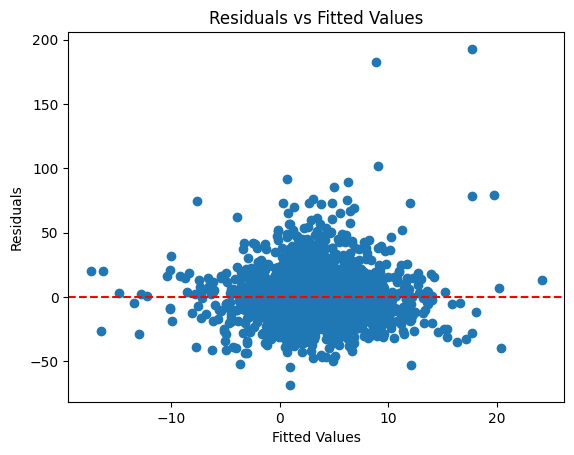

In [19]:
import matplotlib.pyplot as plt
residuals = model.resid
fitted = model.fittedvalues

# Residual plot
plt.scatter(fitted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
# Stationary Test
adf = adfuller(y_data,autolag='AIC')
print(f'P-Value: {adf[1]}')


P-Value: 5.795387060234668e-20


In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan
#Heteroscedasticity Test P < 0.05 ok
# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)
bp_test_results = pd.DataFrame({
    'Statistic': [bp_test[0]],      # Lagrange Multiplier Statistic
    'p-value': [bp_test[1]],         # p-value
    'f-value': [bp_test[2]],         # f-value
    'f p-value': [bp_test[3]]        # f p-value
})

print(bp_test_results)

   Statistic       p-value   f-value     f p-value
0  68.478913  1.527734e-09  5.365168  1.188045e-09


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Multicollinearity Test 0 < X < 10 ok
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = x_data.columns
vif_data['VIF'] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                  Feature         VIF
0                PE_Ratio    1.015842
1        PX_TO_BOOK_RATIO    3.531612
2                  IS_EPS    1.290183
3         EQY_DVD_YLD_12M    2.738681
4               CUR_RATIO   20.046180
5             QUICK_RATIO  127.070960
6              CASH_RATIO   91.690073
7          RETURN_COM_EQY    6.069846
8             PROF_MARGIN    1.012364
9         RETURN_ON_ASSET    7.388690
10   LT_DEBT_TO_TOT_ASSET   17.095364
11  TOT_DEBT_TO_TOT_ASSET   25.093239
12    TOT_DEBT_TO_TOT_EQY    4.657540


In [23]:
from fixedeffect.fe import fixedeffect, did, getfe

category = ['Company','Date']
cluster = ['Company','Date']
y = ['new_priceChange']
x = finanfac
df[x + y].apply(lambda col: pd.to_numeric(col, errors='coerce')).isnull().sum()
df[x + y] = df[x + y].apply(pd.to_numeric, errors='coerce')

model_fe = fixedeffect(data_df = df,
                      dependent = y,
                      exog_x = x,
                      category = category,
                      cluster = cluster)



result = model_fe.fit()
result.params

category variable(s) is_nested in cluster variables: True


c:\Users\patra\AppData\Local\Programs\Python\Python312\Lib\site-packages\fixedeffect\utils\DemeanDataframe.py:30: UserWarning: panel is unbalanced
  warnings.warn('panel is unbalanced')
c:\Users\patra\AppData\Local\Programs\Python\Python312\Lib\site-packages\fixedeffect\utils\ClusterErr.py:140: UserWarning: Negative eigenvalues set to zero in multi-way clustered variance matrix.
  warnings.warn('Negative eigenvalues set to zero in multi-way clustered variance matrix.')
c:\Users\patra\AppData\Local\Programs\Python\Python312\Lib\site-packages\fixedeffect\utils\WaldTest.py:37: UserWarning: The variance matrix is either rank-deficient or indefinite.
  warnings.warn('The variance matrix is either rank-deficient or indefinite.')


const                    7.792578
PE_Ratio                -0.000306
PX_TO_BOOK_RATIO         1.454012
IS_EPS                   0.408439
EQY_DVD_YLD_12M         -0.955385
CUR_RATIO               -1.968830
QUICK_RATIO              0.525263
CASH_RATIO               1.572073
RETURN_COM_EQY           0.010748
PROF_MARGIN             -0.000300
RETURN_ON_ASSET         -0.230343
LT_DEBT_TO_TOT_ASSET    -0.041232
TOT_DEBT_TO_TOT_ASSET   -0.115926
TOT_DEBT_TO_TOT_EQY      0.003505
dtype: float64

In [24]:
print(result.pvalues)
print(result.rsquared)  # Check the p-values
print(result.rsquared_adj)

const                    7.743428e-05
PE_Ratio                 2.783334e-01
PX_TO_BOOK_RATIO         1.684284e-08
IS_EPS                   2.324178e-02
EQY_DVD_YLD_12M          2.818285e-06
CUR_RATIO                5.938558e-03
QUICK_RATIO              8.507827e-01
CASH_RATIO               5.239984e-01
RETURN_COM_EQY           7.922180e-01
PROF_MARGIN              1.475613e-02
RETURN_ON_ASSET          8.571833e-03
LT_DEBT_TO_TOT_ASSET     4.308618e-01
TOT_DEBT_TO_TOT_ASSET    1.403791e-01
TOT_DEBT_TO_TOT_EQY      5.193712e-01
dtype: float64
0.059332571152411306
0.012397664549059995


In [25]:
from linearmodels.panel.model import RandomEffects

df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2.index = pd.MultiIndex.from_tuples(df2[['Company', 'Date']].apply(tuple, axis=1))
df2.set_index(['Company', 'Date'], inplace=True)
y_data2 = df2['new_priceChange']
x_data2 = df2[finanfac]
x_data_const2 = sm.add_constant(x_data2)

ranModel = RandomEffects(dependent=y_data2,exog=x_data_const2)
ranResult = ranModel.fit()
ranResult

Dep. Variable:,new_priceChange,R-squared:,0.0457
Estimator:,RandomEffects,R-squared (Between):,-0.4715
No. Observations:,3010,R-squared (Within):,0.0485
Date:,"Wed, Oct 16 2024",R-squared (Overall):,0.0457
Time:,16:55:18,Log-likelihood,-1.281e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,11.033
Entities:,50,P-value,0.0000
Avg Obs:,60.200,Distribution:,"F(13,2996)"
Min Obs:,6.0000,,
Max Obs:,82.000,F-statistic (robust):,11.054


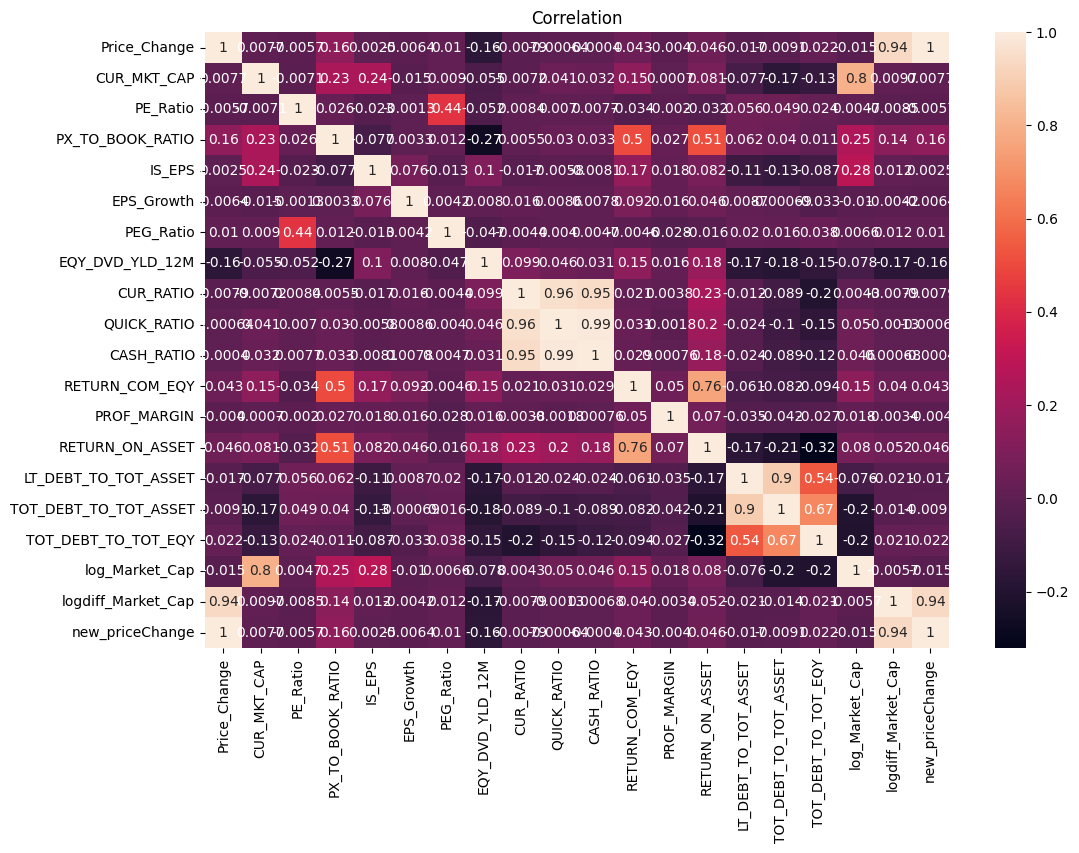

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = df2.drop(['Last_Price'],axis=1)
corr_df.corr().mask(abs(corr_df.corr())<0.5,' ')
plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(),annot=True)
plt.title("Correlation")
plt.show()